In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle

In [15]:
# Feature position positions
features = {'leader':(1,266),
             'ORF1a': (266,13483),
             'ORF1b': (13468, 21555),
             'S':(21563, 25384),
             'ORF3a':(25393,26220),
             'E': (26245, 26472), 
             'M': (26523, 27191),
             'ORF6':(27202, 27387),
             'ORF7a': (27394, 27759),
             'ORF7b': (27756, 27887),
             'ORF8': (27894, 28259),
             'N': (28274, 29533),
             'ORF9b':(28284, 28577),
             'ORF10': (29558, 29674),
             '3\'UTR':(29674, 29904)}

# Choose feature colors
ORF_colors = {'leader':'0.5',
             'ORF1a': cm.Set3.colors[0],
              'ORF1b': cm.Set2.colors[0],
             'S':cm.Set3.colors[1],
             'ORF3a':cm.Set3.colors[2],
             'E': cm.Set3.colors[3], 
             'M': cm.Set3.colors[4],
             'ORF6':cm.Set3.colors[5],
             'ORF7a': cm.Set3.colors[6],
             'ORF7b': cm.Set3.colors[7],
             'ORF8': cm.Set3.colors[8],
             'N': cm.Set3.colors[9],
             'ORF9b':cm.Set3.colors[10],
             'ORF10': cm.Set3.colors[11],
             '3\'UTR':'0.5'}

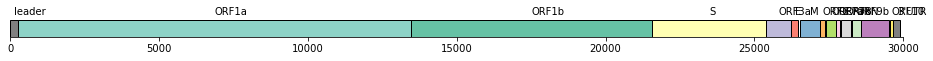

In [20]:
fig, ax = plt.subplots(figsize=(16,.4))

rect = {}

height = 0.6
limits = (0,30_000)

for i, f in enumerate(features):
    # Calculate offset for alternating features to avoid overlap
    dodge = .1 + (i % 2) / 20
    
    # Create rectangle for the feature
    rect[f] = Rectangle(
        (canonical[f][0], dodge), canonical[f][1] - canonical[f][0], height,
        facecolor=ORF_colors[f], linewidth=1, edgecolor='0.0', label=f
    )
    ax.add_patch(rect[f])
    
    # Add feature label on top of the rectangle
    ax.annotate(
        f, (canonical[f][0] + (canonical[f][1] - canonical[f][0]) / 2, dodge + .8),
        annotation_clip=False
    )

# Set axis limits and hide unnecessary elements
_ = ax.set(xlim=limits, ylim=(0, height + 0.2))
ax.yaxis.set_visible(False)
for s in ['top','left','right']:    
    ax.spines[s].set_visible(False)

# Export image (export as svg for edidting)
plt.savefig('./images/genome_feature.png')